In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()

In [2]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
   
    plt.plot(percentages,mean, label=label, color=color)
    plt.fill_between(percentages, mean + std, mean - std, facecolor=color, alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

In [3]:
def treat(arr):
    l = []
    k = []
    for i in range(arr.shape[0]):
        if arr[i]!=0:
            l.append(i)
    return l

In [4]:
random = np.load('new_random.npy')
random.shape

(10, 1000)

In [5]:
l = treat(random[0])

In [6]:
random = random[:,l]

In [7]:
random.shape

(10, 101)

In [8]:
vogn_bald= np.load('vogn_results/vogn_bald.npy')[:,l]
vogn_ent= np.load('vogn_results/vogn_ent.npy')[:,l]
vogn_f= np.load('vogn_results/vogn_f.npy')[:,l]
vogn_std= np.load('vogn_results/vogn_std.npy')[:,l]
vogn_var= np.load('vogn_results/vogn_var.npy')[:,l]

In [9]:
vogn_bald.shape

(5, 101)

In [26]:
mc_bald= np.load('mc_results/mc_bald.npy')[:,l]
mc_ent= np.load('mc_results/mc_ent.npy')[:,l]
mc_f= np.load('mc_results/mc_f.npy')[:,l]
#mc_std= np.load('mc_results/mc_std.npy')
#mc_var= np.load('mc_results/mc_var.npy')

In [28]:
mc_f[0]

array([0.328125, 0.65625 , 0.640625, 0.59375 , 0.828125, 0.78125 ,
       0.8125  , 0.765625, 0.796875, 0.8125  , 0.8125  , 0.8125  ,
       0.796875, 0.75    , 0.78125 , 0.796875, 0.828125, 0.8125  ,
       0.8125  , 0.796875, 0.8125  , 0.8125  , 0.859375, 0.828125,
       0.8125  , 0.859375, 0.828125, 0.828125, 0.8125  , 0.875   ,
       0.875   , 0.8125  , 0.828125, 0.90625 , 0.921875, 0.90625 ,
       0.9375  , 0.921875, 0.9375  , 0.9375  , 0.921875, 0.921875,
       0.90625 , 0.921875, 0.921875, 0.921875, 0.921875, 0.921875,
       0.921875, 0.921875, 0.921875, 0.9375  , 0.953125, 0.9375  ,
       0.9375  , 0.953125, 0.953125, 0.96875 , 0.96875 , 0.96875 ,
       0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125,
       0.953125, 0.953125, 0.96875 , 0.953125, 0.953125, 0.953125,
       0.953125, 0.96875 , 0.953125, 0.953125, 0.953125, 0.953125,
       0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125,
       0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953

In [11]:
nnn = np.arange(101)

<Figure size 432x288 with 0 Axes>

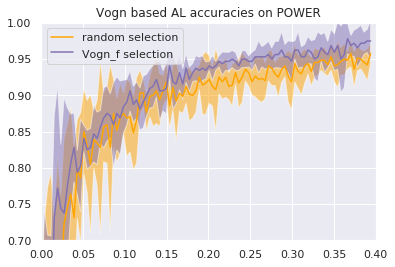

In [23]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.4), ylim=(0.7, 1), autoscale_on=False,title='Vogn based AL accuracies on POWER')
plot_mean_std(nnn/254,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn/254,vogn_bald[:,:101],'Vogn_bald selection',color='blue')
#plot_mean_std(nnn/254,vogn_ent[:,:101],'Vogn_ent selection',color='r')
plot_mean_std(nnn/254,vogn_f[:,:101],'Vogn_f selection',color='m')
#plot_mean_std(nnn/254,vogn_std[:,:101],'Vogn_std selection',color='y')
#plot_mean_std(nnn/254,vogn_var[:,:101],'Vogn_var selection',color='k')
plt.savefig('graph_vogn_02.png')

<Figure size 432x288 with 0 Axes>

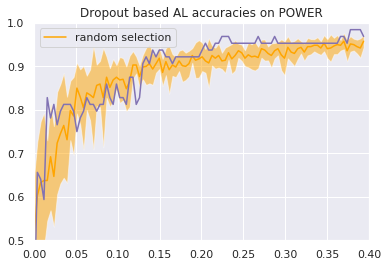

In [31]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.4), ylim=(0.5, 1), autoscale_on=False,title='Dropout based AL accuracies on POWER')
plot_mean_std(nnn/254,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn/254,mc_bald[:,:101],'mc_bald selection',color='blue')
#plot_mean_std(nnn/254,mc_ent[:,:101],'mc_ent selection',color='r')
plt.plot(nnn/254,mc_f[0,:101],color='m')
#plot_mean_std(nnn/254,mc_std[:,:101],'mc_std selection',color='y')
#plot_mean_std(nnn/254,mc_var[:,:101],'mc_var selection',color='k')
plt.savefig('graph_mc_02.png')

plt.clf()
plot_mean_std(np.arange(684)[1:101]/3420,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn/3420,vogn_bald,'Vogn_bald selection',color='blue')
plot_mean_std(nnn/3420,vogn_ent,'Vogn_ent selection',color='r')
plot_mean_std(nnn/3420,vogn_f,'Vogn_f selection',color='m')
plot_mean_std(nnn/3420,vogn_std,'Vogn_std selection',color='y')
plot_mean_std(nnn/3420,vogn_var,'Vogn_var selection',color='k')
plt.savefig('graph_vogn.png')

plt.clf()
plot_mean_std(np.arange(684)/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,mc_bald,'mc_bald selection',color='blue')
plot_mean_std(nnn/3420,mc_ent,'mc_ent selection',color='r')
plot_mean_std(nnn/3420,mc_f,'mc_f selection',color='m')
plot_mean_std(nnn/3420,mc_std,'mc_std selection',color='y')
plot_mean_std(nnn/3420,mc_var,'mc_var selection',color='k')
plt.savefig('graph_mc.png')

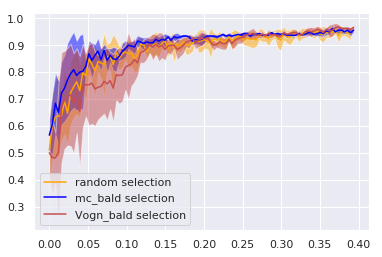

In [21]:
plt.clf()
#plt.plot(np.arange(100)/254,correct*np.ones(100),label='eval best precision',color='k')
plot_mean_std(np.arange(100)/254,random[:,:100],'random selection',color='orange')
plot_mean_std(nnn[:101]/254,mc_bald[:,:101],'mc_bald selection',color='blue')
plot_mean_std(nnn[:101]/254,vogn_bald[:,:101],'Vogn_bald selection',color='r')

In [15]:
plt.clf()
plt.plot(np.arange(100)/254,correct*np.ones(100),label='eval best precision',color='k')
plot_mean_std(np.arange(100)/254,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn/254,mc_ent[:,:101],'mc_ent selection',color='blue')
plot_mean_std(nnn/254,vogn_ent[:,:101],'Vogn_ent selection',color='r')

NameError: name 'correct' is not defined

<Figure size 432x288 with 0 Axes>

In [16]:
plt.clf()
plt.plot(np.arange(100)/254,correct*np.ones(100),label='eval best precision',color='k')
plot_mean_std(np.arange(100)/254,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn/254,mc_f[:,:101],'mc_f selection',color='blue')
plot_mean_std(nnn/254,vogn_f[:,:101],'Vogn_f selection',color='r')

NameError: name 'correct' is not defined

<Figure size 432x288 with 0 Axes>

In [17]:
plt.clf()
plt.plot(np.arange(100)/254,correct*np.ones(100),label='eval best precision',color='k')
plot_mean_std(np.arange(100)/254,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn/254,mc_std[:,:101],'mc_std selection',color='blue')
plot_mean_std(nnn/254,vogn_std[:,:101],'Vogn_std selection',color='r')

NameError: name 'correct' is not defined

<Figure size 432x288 with 0 Axes>

In [18]:
plt.clf()
plt.plot(np.arange(100)/254,correct*np.ones(100),label='eval best precision',color='k')
plot_mean_std(np.arange(100)/254,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn/254,mc_var[:,:101],'mc_var selection',color='blue')
plot_mean_std(nnn/254,vogn_var[:,:101],'Vogn_var selection',color='r')

NameError: name 'correct' is not defined

<Figure size 432x288 with 0 Axes>